In [2]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
loan = pd.read_csv("loan.csv", index_col = False)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the Dataset
###### Checking the top 5 rows
###### Percentage of Null values in each column
###### Cheking the shape of dataset

In [4]:
## printing the shape of dataset
print(loan.shape)

(39717, 111)


In [5]:
## Checking the type of each column
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [6]:
## checking the top 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
## checking the percentage of null values in each column
percent_null = pd.DataFrame((loan.isnull().sum()/loan.shape[0])).reset_index().rename(columns = {"index":"column_name", 0:"percent"})

In [8]:
## Getting Column Names who has more than 60% Null values
cols_to_delete = list(percent_null.loc[percent_null["percent"]>0.6, "column_name"])
print(len(cols_to_delete), " Columns with more than 60% NUll values")
print(len(percent_null.loc[percent_null["percent"]>0.9, "column_name"]), " Columns with more than 90% NUll values")

57  Columns with more than 60% NUll values
56  Columns with more than 90% NUll values


In [9]:
len(cols_to_delete)

57

In [10]:
## Checking how many values are '0' in columns
all_zero = list(loan.loc[:,(loan == 0).all(axis=0)].columns)
print(len(all_zero), " Columns having all values 0")

2  Columns having all values 0


In [11]:
all_zero

['acc_now_delinq', 'delinq_amnt']

### Data Cleaning


In [12]:
## Dropping all columns where Percentage of Null values are more than 60%
loan = loan.drop(columns=cols_to_delete)
print(loan.shape)

(39717, 54)


In [13]:
## Dropping all columns who has all values equal to '0'
loan = loan.drop(columns=all_zero)

In [14]:
## Checking the Shape
loan.shape

(39717, 52)

In [15]:
## Checking the top 5 and last 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0


In [16]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.0,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,0.0,Jun-10,256.59,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [17]:
### Checking how many Null values are still present in each column
(loan.isnull().sum()/loan.shape[0]) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [18]:
## Dropping the 'desc' column as well
loan.drop("desc", axis=1, inplace= True)

In [19]:
## Checking percentage of rows we are removing having even a single null value
(1 - loan.dropna(axis=0, how="any").shape[0]/loan.shape[0]) * 100
## We only lose around 8% data if we drop all rows having even a single null value.
## So, we are not losing much data. Hence we can continue with strategy.

8.273535261978493

In [20]:
## Dropping rows even if they have one Null value
loan = loan.dropna(axis=0, how="any")

In [21]:
loan.shape

(36431, 51)

In [22]:
## Again cheking if there are any columns which has only '0' as value
print(loan.loc[:,(loan == 0).all(axis=0)].columns)
## The below 3 columns will not contribute anything in analysis since there is no variation

Index(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], dtype='object')


In [23]:
## Dropping the above 3 columns
loan = loan.drop(list(loan.loc[:,(loan == 0).all(axis=0)].columns), axis=1)

In [24]:
## Checking unique values of oan status
loan["loan_status"].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [25]:
## Now we don't need data for people who are currently paying the loan since we can't do analysis on those people
## So removing rows where 'loan_status' is 'Current'
loan = loan.loc[loan["loan_status"] != "Current",:]

In [26]:
## Checking the final shape after all cleaning
loan.shape

(35365, 48)

### Data Cleaning  and Exploration Summary

1.) There are `56` columns having more than `90%` Null Values

2.) Dropped columns with more than `60%` Null Values ( `57 Columns`)

3.) Dropped description column (`desc`) 

4.) Dropped all rows with one or more than one null values

5.) After above steps, we removed `8.27%` of rows

6.) Once we removed rows we get 3 extra columns having all values equal to 0

7.) Dropping these 3 columns as well there are `48 columns left`

8.) We can't do any analysis on the people who are currently payinh the loan. So, removed the rows where `loan_status` is `Current`

8.) So, we are left with `35365 rows and 48 Columns` for further analysis

In [27]:
## Swarn changes

In [28]:
#loan = loan.drop(columns=['policy_code','initial_list_status'])

In [29]:
## As 'loan_status' column contains Fully Paid with some special characters, replacing that value with 'Fully Paid'
loan['loan_status'] = loan['loan_status'].apply(lambda x: x.replace('/n',''))

In [30]:
bins = [0, 6000, 12000, 18000, 24000, 30000, 36000]
binsRange = ["0-6000", "6000-12000", "12000-18000", "18000-24000","24000-30000","30000-36000"]
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'],bins,labels= binsRange)

In [31]:
### can be removed
def checkStatus(x):
    if(x=='Charged Off'):
        return 1
    else:
        return 0

In [32]:
## Adding a column which will contain 1 for 'charged Off' and 0 for 'Fully Paid'
### can be removed
loan['loan_status_dup'] = loan['loan_status'].apply(lambda x:checkStatus(x) )

In [33]:
Loan_Amnt_PivotTable = loan.pivot_table(values = 'loan_status_dup',index =['loan_amnt_range','loan_status'],aggfunc='sum').reset_index() 
Loan_Amnt_PivotTable_Defaulters = Loan_Amnt_PivotTable[Loan_Amnt_PivotTable['loan_status'] == 'Charged Off']

In [34]:
percentage1 = (Loan_Amnt_PivotTable_Defaulters.loc[0,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "0-6000",'id'].count())*100
percentage2 = (Loan_Amnt_PivotTable_Defaulters.loc[2,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "6000-12000",'id'].count())*100
percentage3 = (Loan_Amnt_PivotTable_Defaulters.loc[4,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "12000-18000",'id'].count())*100
percentage4 = (Loan_Amnt_PivotTable_Defaulters.loc[6,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "18000-24000",'id'].count())*100
percentage5 = (Loan_Amnt_PivotTable_Defaulters.loc[8,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "24000-30000",'id'].count())*100
percentage6 = (Loan_Amnt_PivotTable_Defaulters.loc[10,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "30000-36000",'id'].count())*100
# percentage7 = (Loan_Amnt_PivotTable_Defaulters.loc[12,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "18000-21000",'id'].count())*100
# percentage8 = (Loan_Amnt_PivotTable_Defaulters.loc[14,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "21000-24000",'id'].count())*100
# percentage9 = (Loan_Amnt_PivotTable_Defaulters.loc[16,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "24000-27000",'id'].count())*100
# percentage10 = (Loan_Amnt_PivotTable_Defaulters.loc[18,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "27000-30000",'id'].count())*100
# percentage11 = (Loan_Amnt_PivotTable_Defaulters.loc[20,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "30000-33000",'id'].count())*100
# percentage12 = (Loan_Amnt_PivotTable_Defaulters.loc[22,'loan_status_dup']/loan.loc[loan['loan_amnt_range'] == "33000-36000",'id'].count())*100


In [37]:
Loan_Amnt_PivotTable_Defaulters['Default_Percentage'] = [percentage1,percentage2,percentage3,percentage4,percentage5,percentage6]
Loan_Amnt_PivotTable_Defaulters = Loan_Amnt_PivotTable_Defaulters.sort_values(by="Default_Percentage",ascending=False)
Loan_Amnt_PivotTable_Defaulters

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,loan_amnt_range,loan_status,loan_status_dup,Default_Percentage
10,30000-36000,Charged Off,160,23.952096
8,24000-30000,Charged Off,376,18.513048
6,18000-24000,Charged Off,531,17.112472
4,12000-18000,Charged Off,927,15.147059
0,0-6000,Charged Off,1391,12.605347
2,6000-12000,Charged Off,1557,12.548356


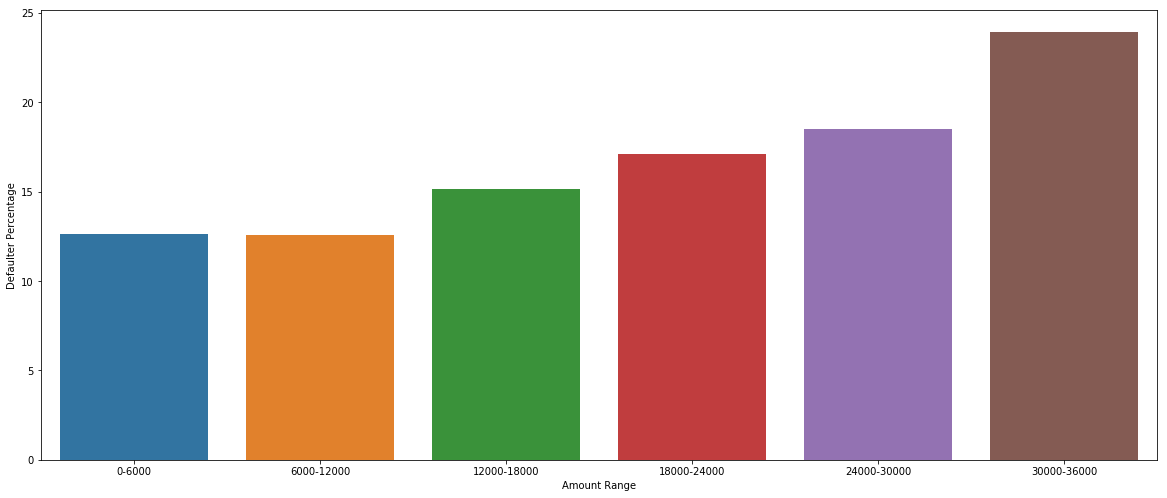

In [38]:
## Graph which shows loan amount requested and defaulter, in this we can see which amount category loans are most defaulted.
plot = sns.barplot(x='loan_amnt_range', y='Default_Percentage', data=Loan_Amnt_PivotTable_Defaulters)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Amount Range', ylabel='Defaulter Percentage')
plt.show()

In [966]:
## 'home_ownership' column based

In [967]:
Home_Owner_DefaultRate = loan[['home_ownership','loan_status_dup']].groupby(by='home_ownership',sort = True).sum().reset_index()

In [968]:
Home_Owner_DefaultRate = Home_Owner_DefaultRate[Home_Owner_DefaultRate['home_ownership'] != "NONE"]
Home_Owner_DefaultRate

,home_ownership,loan_status_dup
0,MORTGAGE,2061
1,OTHER,18
2,OWN,346
3,RENT,2517


In [969]:
percentage1 = (Home_Owner_DefaultRate.loc[0,'loan_status_dup']/loan.loc[loan['home_ownership'] == "MORTGAGE",'id'].count())*100
percentage2 = (Home_Owner_DefaultRate.loc[1,'loan_status_dup']/loan.loc[loan['home_ownership'] == "OTHER",'id'].count())*100
percentage3 = (Home_Owner_DefaultRate.loc[2,'loan_status_dup']/loan.loc[loan['home_ownership'] == "OWN",'id'].count())*100
percentage4 = (Home_Owner_DefaultRate.loc[3,'loan_status_dup']/loan.loc[loan['home_ownership'] == "RENT",'id'].count())*100
Home_Owner_DefaultRate['Default Percentage'] = [percentage1,percentage2,percentage3,percentage4]

[Text(0, 0.5, 'Defaulter Percentage'), Text(0.5, 0, 'Home Type')]

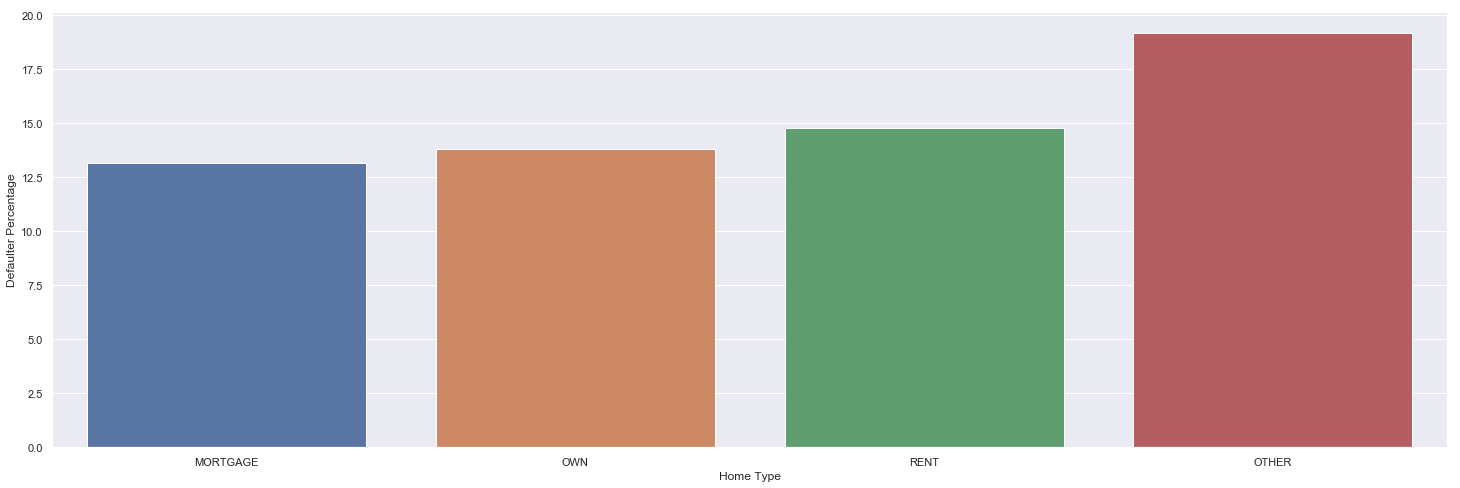

In [970]:
## Plot showing defaulters based on the home type.
plot2 = sns.barplot( x= 'home_ownership',y ='Default Percentage',data = Home_Owner_DefaultRate.sort_values(by="Default Percentage"))
plot2.set(xlabel='Home Type', ylabel='Defaulter Percentage')

## People with Rent home type default the most.

In [41]:
def removeExtra(x):
    newX = x.replace('years','')
    newX = x.replace('/n','')
    return newX
    

In [42]:
## emp_length
loan['emp_length'] = loan['emp_length'].apply(lambda x:removeExtra(x) )

loan['emp_length'] = loan['emp_length'].replace('10+ years','10')
loan['emp_length'] = loan['emp_length'].replace('< 1 year','1')


In [43]:
def checkNum(x):
    for s in x.split():
        if(s.isdigit()):
            return s

In [44]:
loan['Year Expereince'] = loan['emp_length'].apply(lambda x: checkNum(x))
loan['Year Expereince'] = pd.to_numeric(loan['Year Expereince'])

In [47]:
## Binning of 'Year Experience' column.
bins = [0,4,8,10]
groups = ["0-4","4-8", "8+"] 
loan['Experience Range'] = pd.cut(loan['Year Expereince'],bins,labels=groups)

In [69]:
tempData = loan.loc[loan['loan_status_dup'] == 1]
temp = tempData.groupby("Experience Range").agg({"loan_amnt":"mean"}).reset_index()

In [70]:
temp

,Experience Range,loan_amnt
0,0-4,10905.685584
1,4-8,12541.986063
2,8+,14485.833333


In [49]:
ageDefaultRate = tempData.pivot_table(values = 'loan_status_dup',index = 'Experience Range',aggfunc='sum')

In [50]:
ageDefaultRate = ageDefaultRate.reset_index()

In [54]:
percentage1 = (ageDefaultRate.loc[0,'loan_status_dup']/loan.loc[loan['Experience Range'] == "0-4",'id'].count())*100
percentage2 = (ageDefaultRate.loc[1,'loan_status_dup']/loan.loc[loan['Experience Range'] == "4-8",'id'].count())*100
# percentage3 = (ageDefaultRate.loc[2,'loan_status_dup']/loan.loc[loan['Experience Range'] == "8-6",'id'].count())*100
# percentage4 = (ageDefaultRate.loc[3,'loan_status_dup']/loan.loc[loan['Experience Range'] == "6-8",'id'].count())*100
percentage5 = (ageDefaultRate.loc[2,'loan_status_dup']/loan.loc[loan['Experience Range'] == "8+",'id'].count())*100
ageDefaultRate['Default_Percentage'] = [percentage1,percentage2,percentage5]
ageDefaultRate

,Experience Range,loan_status_dup,Default_Percentage
0,0-4,2414,13.368777
1,4-8,1148,14.165844
2,8+,1380,14.993481


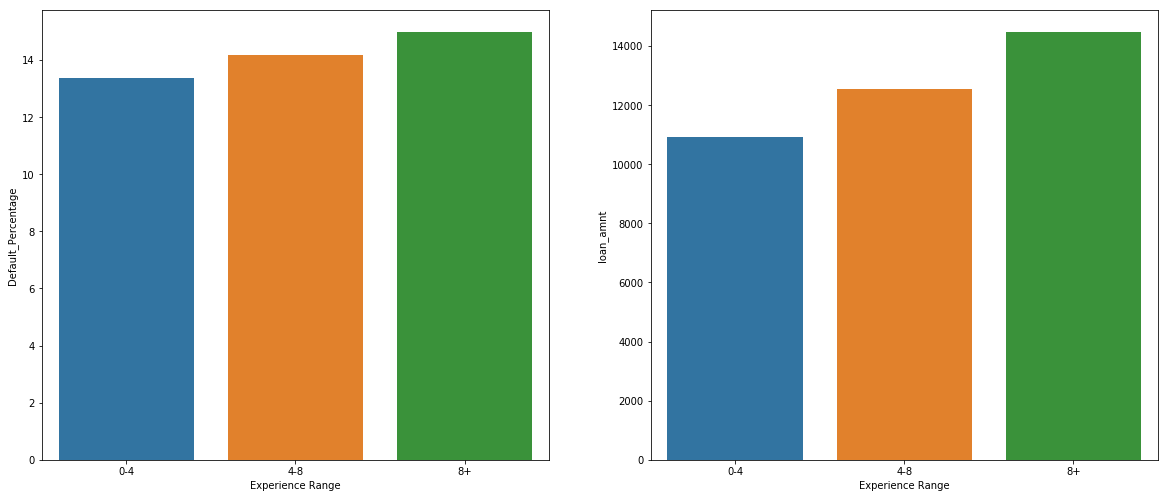

In [72]:
#subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='Experience Range', y='Default_Percentage', data=ageDefaultRate)
# plt.title("Average Sales")
plt.gcf().set_size_inches(20, 8.27)
# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='Experience Range', y='loan_amnt', data=temp)
# plt.title("Median Sales")
plt.show()

In [981]:
## DTI column

In [73]:
bins = [0,10, 20, 30]
groups =["0-10","10-20","20-30"]
loan['DTI_Range'] = pd.cut(loan['dti'],bins,labels=groups)

In [74]:
DTIDefaultRate = loan[['DTI_Range','loan_status_dup']].groupby(by="DTI_Range",sort=True).sum()
DTIDefaultRate = DTIDefaultRate.reset_index()
DTIDefaultRate

,DTI_Range,loan_status_dup
0,0-10,1344
1,10-20,2494
2,20-30,1081


In [84]:
Range1Len = loan.loc[loan['DTI_Range'] == "0-10",'id'].count()
Range2Len = loan.loc[loan['DTI_Range'] == "10-20",'id'].count()
Range3Len = loan.loc[loan['DTI_Range'] == "20-30",'id'].count()
# Range4Len = loan.loc[loan['DTI_Range'] == "15-20",'id'].count()
# Range5Len = loan.loc[loan['DTI_Range'] == "20-25",'id'].count()
# Range6Len = loan.loc[loan['DTI_Range'] == "25-30",'id'].count()

In [85]:
Percentage1 = (test.loc[0,'loan_status_dup']/Range1Len)*100
Percentage2 = (test.loc[1,'loan_status_dup']/Range2Len)*100
Percentage3 = (test.loc[2,'loan_status_dup']/Range3Len)*100
# Percentage4 = (test.loc[3,'loan_status_dup']/Range4Len)*100
# Percentage5 = (test.loc[4,'loan_status_dup']/Range5Len)*100
# Percentage6 = (test.loc[5,'loan_status_dup']/Range6Len)*100


In [86]:
Percentage = [Percentage1,Percentage2,Percentage3]
DTIDefaultRate['Default_Percentage'] = Percentage


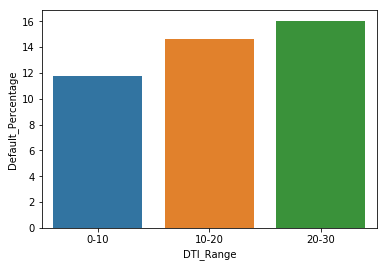

In [87]:
ax = sns.barplot(y ='Default_Percentage',x = 'DTI_Range', data = DTIDefaultRate)

## In this graph we can see that as dti value increases the default percentage also increases.
##So we should give loan to people with low dti.

In [989]:
## Installment column

In [88]:
bins=[0,500,1000,1500]
groups = ["0-500","500-1000","1000-1500"]
loan['Loan_Installment_Range'] = pd.cut(loan['installment'],bins,labels=groups) 

In [93]:
check = loan.groupby(by="Loan_Installment_Range",sort=True).sum().reset_index()
check

,Loan_Installment_Range,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_dup,Year Expereince
0,0-500,19807222525,24702427056,251682175,244211350,2.355838e+08,7217452.94,1.832182e+09,387433.68,4306,...,2.213698e+08,45413537.80,32099.004181,1.779214e+06,212962.6880,61591096.57,29113,1271.0,3938,144109
1,500-1000,4214803594,5242637936,135069950,133119075,1.262628e+08,4006166.80,5.827751e+08,83809.54,843,...,1.174151e+08,29620471.75,13983.770571,1.581356e+06,211693.4737,36266412.84,6044,198.0,982,34902
2,1000-1500,180922534,224932313,6972775,6967550,6.928331e+06,236236.86,2.868466e+07,2793.70,26,...,6.610902e+06,1251869.47,110.132465,2.213002e+04,771.2692,1649713.02,208,3.0,22,1216


In [90]:
percentage1 = (check.loc[0,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "0-500",'id'].count())*100
percentage2 = (check.loc[1,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "500-1000",'id'].count())*100
percentage3 = (check.loc[2,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "1000-1500",'id'].count())*100
# percentage4 = (check.loc[3,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "600-800",'id'].count())*100
# percentage5 = (check.loc[4,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "800-1000",'id'].count())*100
# percentage6 = (check.loc[5,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "1000-1200",'id'].count())*100
# percentage7 = (check.loc[6,'loan_status_dup']/loan.loc[loan['Loan_Installment_Range'] == "1200-1400",'id'].count())*100
check['Default_Percentage'] = [percentage1,percentage2,percentage3]

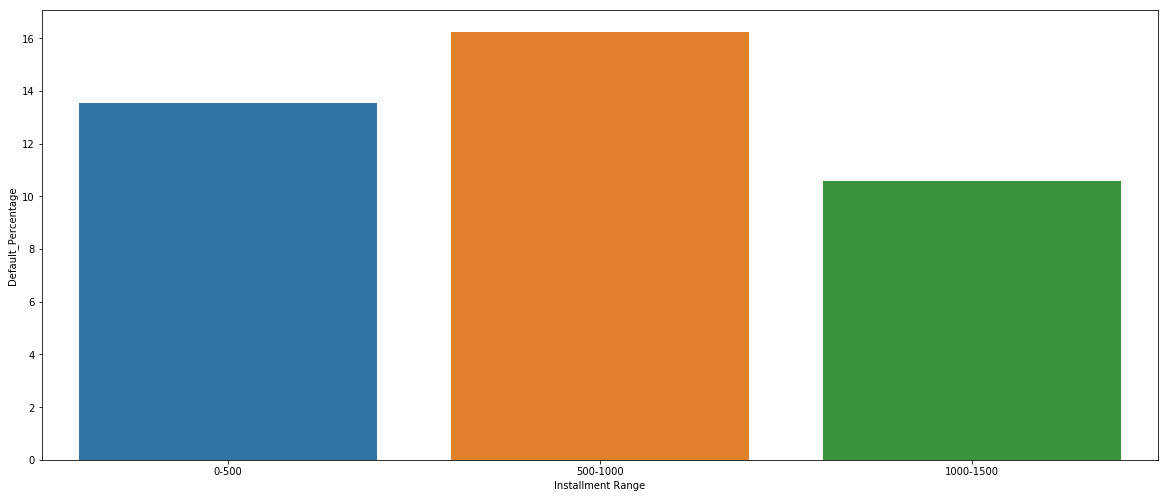

In [91]:
## This plot shows us the installment rate and the default percentage. Default percentage gradually increases but then falls for higher installments.
plot = sns.barplot(x='Loan_Installment_Range', y='Default_Percentage', data=check)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Installment Range', ylabel='Default_Percentage')
plt.show()

In [994]:
## We can find duration of the loan from these two columns, and then see what loan durations default the most.
loan[['issue_d','last_pymnt_d']]

,issue_d,last_pymnt_d
1,Dec-11,Apr-13
3,Dec-11,Jan-15
5,Dec-11,Jan-15
6,Dec-11,May-16
7,Dec-11,Jan-15
9,Dec-11,Nov-12
10,Dec-11,Jun-13
11,Dec-11,Sep-13
12,Dec-11,Jul-12
13,Dec-11,Jan-15


In [995]:
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
#loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'])

In [996]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [997]:
loan['Duration_Months'] = ((loan['last_pymnt_d']-loan['issue_d'])/np.timedelta64(1, 'M')).round()
loan['Duration_Months'] = loan['Duration_Months'].astype(int)

In [998]:
bins=[0,10,20,30,40,50,60,70]
groups = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70"]
loan['Duration Range'] = pd.cut(loan['Duration_Months'],bins,labels=groups)

In [999]:
loan.groupby(by="Duration Range").sum()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_dup,Year Expereince,Duration_Months
Duration Range,,,,,,,,,,,,,,,,,,,,,
0-10,3060444304,3812525056,49280225,47939950,4.476246e+07,1416684.74,3.088021e+08,56250.85,719,4435,...,2759438.65,4026.577756,9.919778e+05,142496.8371,25438744.08,4389,195.0,1350,22044,26735
10-20,4224939393,5263189517,69150525,67566825,6.438261e+07,2033460.70,4.277777e+08,79911.35,898,5720,...,9267019.42,8103.993504,1.060695e+06,146108.5711,28344733.70,6092,258.0,1501,30934,95632
20-30,4587610489,5714106956,75452275,73856650,7.123013e+07,2243120.36,4.563695e+08,88775.22,880,5738,...,14347412.62,8555.512917,7.584370e+05,70064.5076,23175119.01,6634,309.0,1183,33430,169697
30-40,9863607853,12260149370,148613025,146086100,1.405111e+08,4602382.32,9.883402e+08,197759.26,2157,11718,...,30368378.83,19108.223905,3.857674e+05,37019.4117,14894530.45,14701,556.0,588,73989,525725
40-50,1073344651,1347173347,22629650,21749775,2.130315e+07,526154.14,1.062514e+08,21188.95,204,1229,...,8593320.69,3034.143932,1.561583e+05,24360.4273,5659661.70,1427,62.0,239,8171,64937
50-60,1043739689,1325774418,21501575,20292575,1.996767e+07,478783.73,1.155251e+08,22144.39,235,1343,...,8257119.48,2291.690302,2.751435e+04,5061.9959,1843472.87,1556,64.0,79,8441,88313
60-70,349262274,447078641,7097625,6806100,6.617825e+06,159270.61,4.057558e+07,8006.90,82,475,...,2693189.33,1072.764901,2.149860e+03,315.6802,150960.62,566,28.0,2,3218,34603


In [1000]:
loanDurationGrp = loan.pivot_table(values = 'loan_status_dup',index='Duration Range',aggfunc='sum')
loanDurationGrp = loadDurationGrp.reset_index()
loanDurationGrp

,Duration Range,loan_status_dup
0,0-10,1350
1,10-20,1501
2,20-30,1183
3,30-40,588
4,40-50,239
5,50-60,79
6,60-70,2


In [1001]:
TotalLoanDurRange1 = loan.loc[loan['Duration Range']=="0-10",'id'].count()
TotalLoanDurRange2 = loan.loc[loan['Duration Range']=="10-20",'id'].count()
TotalLoanDurRange3 = loan.loc[loan['Duration Range']=="20-30",'id'].count()
TotalLoanDurRange4 = loan.loc[loan['Duration Range']=="30-40",'id'].count()
TotalLoanDurRange5 = loan.loc[loan['Duration Range']=="40-50",'id'].count()
TotalLoanDurRange6 = loan.loc[loan['Duration Range']=="50-60",'id'].count()
TotalLoanDurRange7 = loan.loc[loan['Duration Range']=="60-70",'id'].count()


In [1002]:
PercentageLoanDurRange1 = (loanDurationGrp.loc[0,'loan_status_dup']/TotalLoanDurRange1)*100
PercentageLoanDurRange2 = (loanDurationGrp.loc[1,'loan_status_dup']/TotalLoanDurRange2)*100
PercentageLoanDurRange3 = (loanDurationGrp.loc[2,'loan_status_dup']/TotalLoanDurRange3)*100
PercentageLoanDurRange4 = (loanDurationGrp.loc[3,'loan_status_dup']/TotalLoanDurRange4)*100
PercentageLoanDurRange5 = (loanDurationGrp.loc[4,'loan_status_dup']/TotalLoanDurRange5)*100
PercentageLoanDurRange6 = (loanDurationGrp.loc[5,'loan_status_dup']/TotalLoanDurRange6)*100
PercentageLoanDurRange7 = (loanDurationGrp.loc[6,'loan_status_dup']/TotalLoanDurRange7)*100

In [1003]:
percentage = [PercentageLoanDurRange1,PercentageLoanDurRange2,PercentageLoanDurRange3,PercentageLoanDurRange4,PercentageLoanDurRange5,PercentageLoanDurRange6,PercentageLoanDurRange7]
loanDurationGrp['DefaulterPercentage'] = percentage
loanDurationGrp 

,Duration Range,loan_status_dup,DefaulterPercentage
0,0-10,1350,30.758715
1,10-20,1501,24.638871
2,20-30,1183,17.832379
3,30-40,588,3.999728
4,40-50,239,16.748423
5,50-60,79,5.077121
6,60-70,2,0.353357


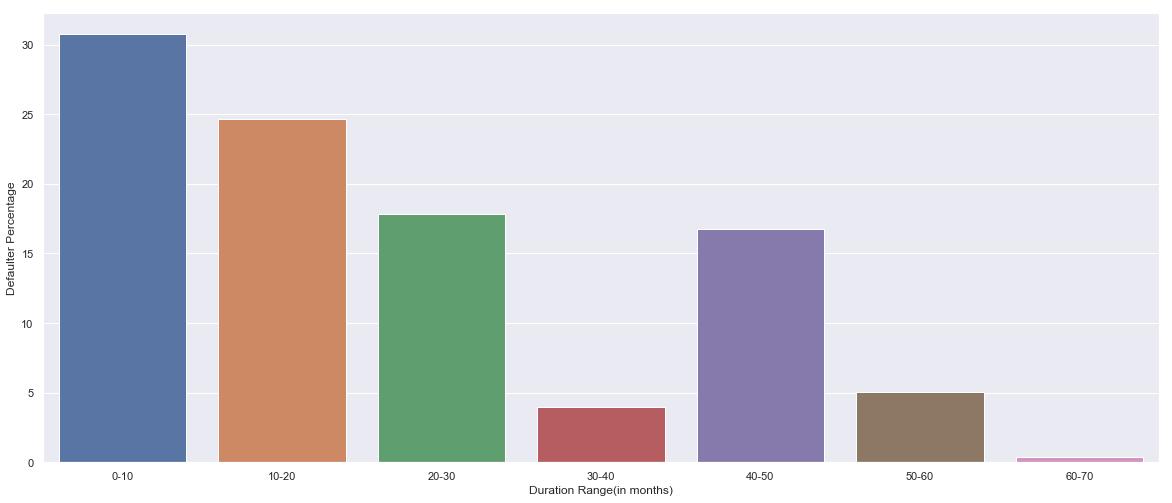

In [1004]:
plot = sns.barplot(x='Duration Range', y='DefaulterPercentage', data=loanDurationGrp)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Duration Range(in months)', ylabel='Defaulter Percentage')
plt.show()

## This plot shows us that, as the duration of the loan increases, the default percentage decreases.
##So, more duration loans default less and less duration loans default more.

In [1005]:
## column revol_util

In [1006]:
loan['revol_util'] = loan['revol_util'].apply(lambda x:x.replace('%',''))

In [1007]:
loan['revol_util'] = pd.to_numeric(loan['revol_util'])

In [1008]:
bins=[0,20,40,60,80,100]
groups = ["0-20","20-40","40-60","60-80","80-100"]
loan['RevolUtilGrp'] = pd.cut(loan['revol_util'],bins,labels=groups)

In [1009]:
LoanRevolUtil = loan.groupby(by="RevolUtilGrp",sort=True).sum()

In [1010]:
LoanRevolUtil = LoanRevolUtil.reset_index()

In [1011]:
percentage1 = (LoanRevolUtil.loc[0,'loan_status_dup']/loan.loc[loan['RevolUtilGrp'] == "0-20",'id'].count())*100
percentage2 = (LoanRevolUtil.loc[1,'loan_status_dup']/loan.loc[loan['RevolUtilGrp'] == "20-40",'id'].count())*100
percentage3 = (LoanRevolUtil.loc[2,'loan_status_dup']/loan.loc[loan['RevolUtilGrp'] == "40-60",'id'].count())*100
percentage4 = (LoanRevolUtil.loc[3,'loan_status_dup']/loan.loc[loan['RevolUtilGrp'] == "60-80",'id'].count())*100
percentage5 = (LoanRevolUtil.loc[4,'loan_status_dup']/loan.loc[loan['RevolUtilGrp'] == "80-100",'id'].count())*100
LoanRevolUtil['Default_percentage'] = [percentage1,percentage2,percentage3,percentage4,percentage5]

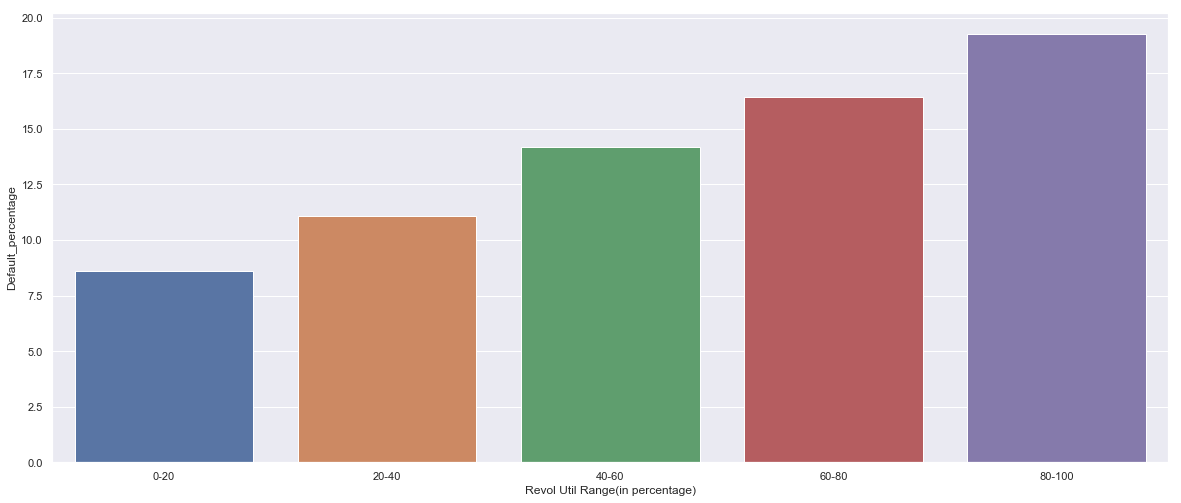

In [1012]:
plot = sns.barplot(x='RevolUtilGrp', y='Default_percentage', data=LoanRevolUtil)
plt.gcf().set_size_inches(20, 8.27)
plot.set(xlabel='Revol Util Range(in percentage)', ylabel='Default_percentage')
plt.show()

## We can see that as the dti increases, default count also increases.
## So we can say that dti increases, default count also increases.

In [1013]:
## Relation between grade and sub grade
LoanByGrade = loan.groupby(by=['grade','sub_grade'],sort=True).sum()
LoanByGrade = LoanByGrade.reset_index()

Text(0.5, 1.0, 'bar chart')

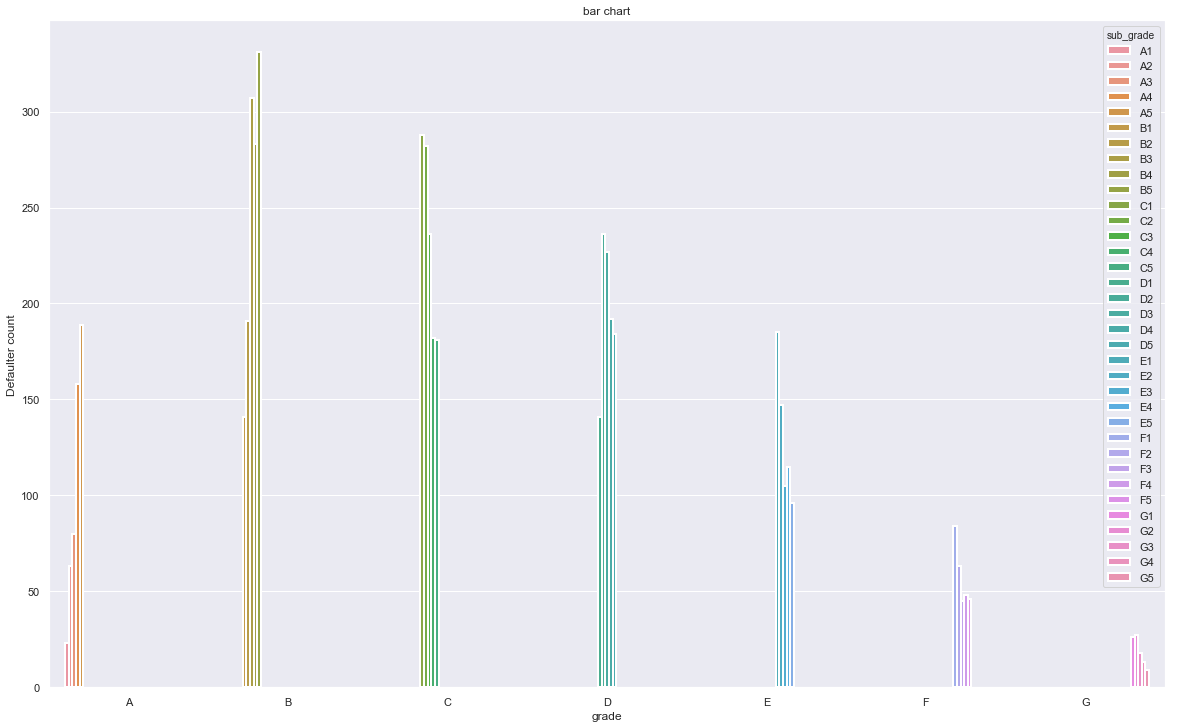

In [1014]:
sns.set(rc={'figure.figsize':(20,12.27)})

plot = sns.barplot(x="grade", y="loan_status_dup",hue="sub_grade",
            data=LoanByGrade,linewidth=2);
plot.set(xlabel='grade', ylabel='Defaulter count')
plt.title("bar chart")
#lt.yscale('log')

In [1015]:
# int_rate column


In [1016]:
loan['int_rate'] = loan['int_rate'].apply(lambda x:x.replace('%',''))
loan['int_rate'] = pd.to_numeric(loan['int_rate'])


In [1017]:
breaks = [5,10,15,20,25]
groups = ["5-10","10-15","15-20","20-25"]
loan['Int_Rate_Range'] = pd.cut(loan['int_rate'],breaks,labels=groups)

In [98]:
Loan_Int_Rate_Group = loan.groupby(by="Int_Rate_Range").agg({"loan_status":"sum"})

KeyError: 'Int_Rate_Range'

In [1019]:
percentage1 = (Loan_Int_Rate_Group.loc[0,'loan_status_dup']/loan.loc[loan['Int_Rate_Range'] == "5-10",'id'].count())*100
percentage2 = (Loan_Int_Rate_Group.loc[1,'loan_status_dup']/loan.loc[loan['Int_Rate_Range'] == "10-15",'id'].count())*100
percentage3 = (Loan_Int_Rate_Group.loc[2,'loan_status_dup']/loan.loc[loan['Int_Rate_Range'] == "15-20",'id'].count())*100
percentage4 = (Loan_Int_Rate_Group.loc[3,'loan_status_dup']/loan.loc[loan['Int_Rate_Range'] == "20-25",'id'].count())*100

In [1020]:
percentage = [percentage1,percentage2,percentage3,percentage4]
Loan_Int_Rate_Group['Defaut_Percentage'] = percentage

Text(0.5, 1.0, 'bar chart')

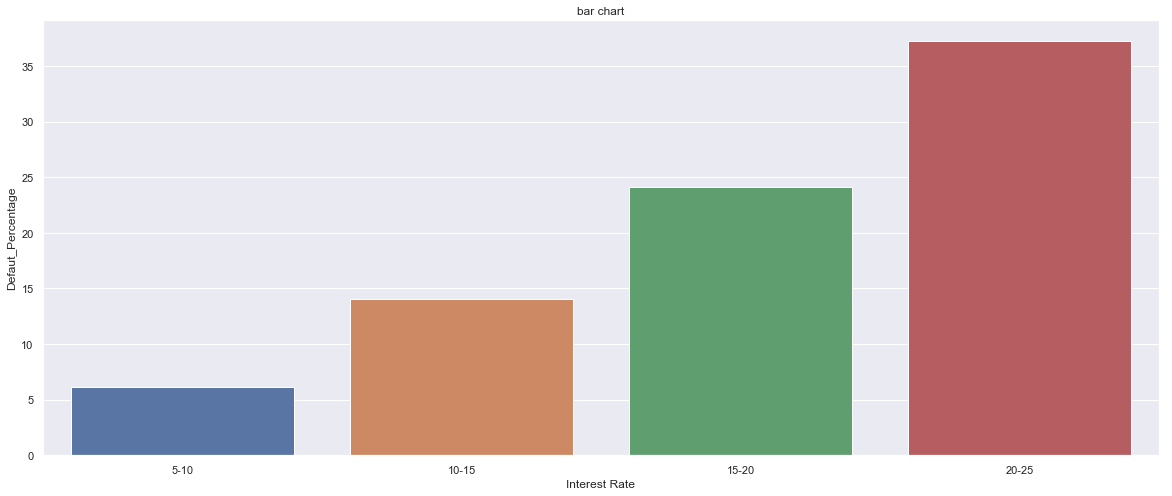

In [1021]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x="Int_Rate_Range", y="Defaut_Percentage",data=Loan_Int_Rate_Group);
plot.set(xlabel='Interest Rate', ylabel='Defaut_Percentage')
plt.title("bar chart")

## This graph tells us that as the interest rate increases, the default percentage also increases. 
## A person is likely to default when interest rate is high.

In [1022]:
## Checking if the loan requested and loan funded are different, then how default rate is affected.
loan['FundsTypeSame'] = (loan['loan_amnt'] == loan['funded_amnt'])& (loan['loan_amnt'] == loan['funded_amnt_inv'])

In [1023]:
## What is the default percentage of People getting same amount loan as requested.
loan1 = loan.groupby(by="FundsTypeSame").sum().reset_index()

In [1024]:
percentage1 = (loan1.loc[0,'loan_status_dup']/loan.loc[loan['FundsTypeSame'] == True,'id'].count())*100
percentage2 = (loan1.loc[1,'loan_status_dup']/loan.loc[loan['FundsTypeSame'] == True,'id'].count())*100
loan1['DefaultPercentage'] = [percentage1,percentage2]

Text(0.5, 1.0, 'bar chart')

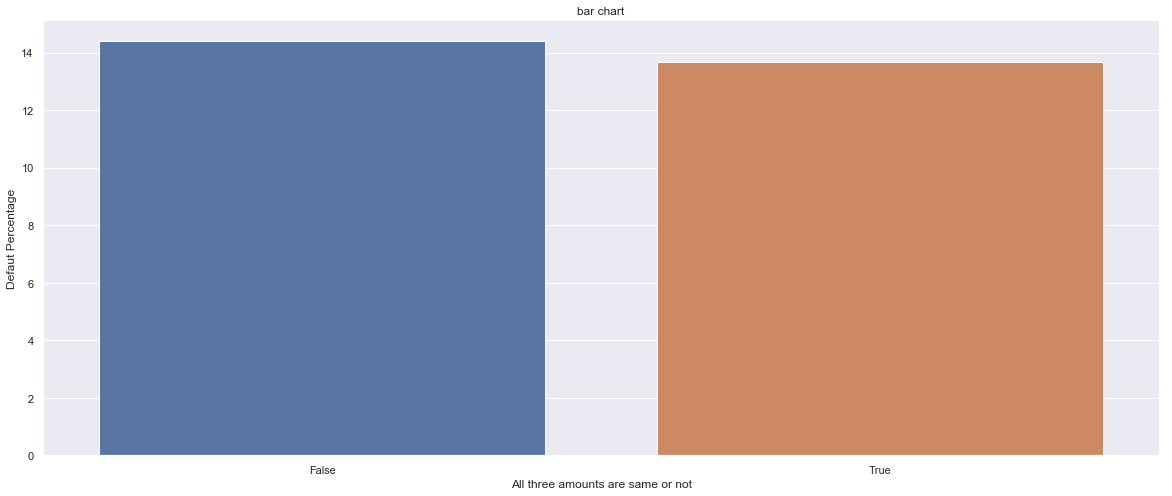

In [1025]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x="FundsTypeSame", y="DefaultPercentage",data=loan1);
plot.set(xlabel='All three amounts are same or not', ylabel='Defaut Percentage')
plt.title("bar chart")

## We can see in this graph that default percentage increases in cases where 
##the funded loan is not same as requested loan. But the difference is not much.

In [1026]:
## Effect of number of delinqs in last two years. Most records have 0 delinq,
## so we cannot use this field as an impactful field to judge default behavior.

In [1027]:
bins = [1,3,6,9,12]
grades = ["1-3","3-6","6-9","9-12"]
loan['delinq_2yrs_range'] = pd.cut(loan['delinq_2yrs'],bins,labels=grades)

In [1028]:
loan.groupby(by = "delinq_2yrs_range").sum()
## In this data we can see that, groups with higher delinq count, have never defaulted.
##So, this range field does not tell us much about the loan being default.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_dup,Year Expereince,Duration_Months,FundsTypeSame
delinq_2yrs_range,,,,,,,,,,,,,,,,,,,,,
1-3,545299000,679582597,8224000,8017875,7.547455e+06,11610.49,247452.72,61097217.38,9867.03,1795,...,1664.879183,127233.95,18985.5675,2151456.03,803,35.0,137,4291,21784,463.0
3-6,61298353,76723129,736425,720975,6.964460e+05,1281.26,21566.09,6424625.22,1127.83,377,...,247.039108,11313.06,1558.3712,169657.01,84,3.0,16,425,2573,55.0
6-9,4940651,6274011,50675,50675,4.907500e+04,116.17,1496.16,447904.00,84.86,53,...,0.000000,628.75,115.1702,7986.41,7,3.0,2,45,186,6.0
9-12,699027,890529,5000,5000,5.000000e+03,10.74,163.08,53000.00,9.74,11,...,0.000000,0.00,0.0000,174.59,1,0.0,0,5,36,1.0


In [1029]:
## We can find what percentage of people default, who have delnqued in last two years.
ZeroDelinqPercentage = (loan.loc[((loan['delinq_2yrs'] == 0) & (loan['loan_status_dup'] == 1)),'id'].count()/loan.loc[loan['delinq_2yrs']==0,'id'].count())*100
NonZeroDelinqPercentage = (loan.loc[((loan['delinq_2yrs'] != 0) & (loan['loan_status_dup'] == 1)),'id'].count()/loan.loc[loan['delinq_2yrs']!=0,'id'].count())*100

In [1030]:
data = {'Delinq_2Years' : ['Zero','Non-Zero'],
       'Default Percentage' : [ZeroDelinqPercentage,NonZeroDelinqPercentage]}
Delinq_2Years = pd.DataFrame(data, columns=['Delinq_2Years','Default Percentage'])

In [1031]:
Delinq_2Years

,Delinq_2Years,Default Percentage
0,Zero,13.808633
1,Non-Zero,15.336463


Text(0.5, 1.0, 'bar chart')

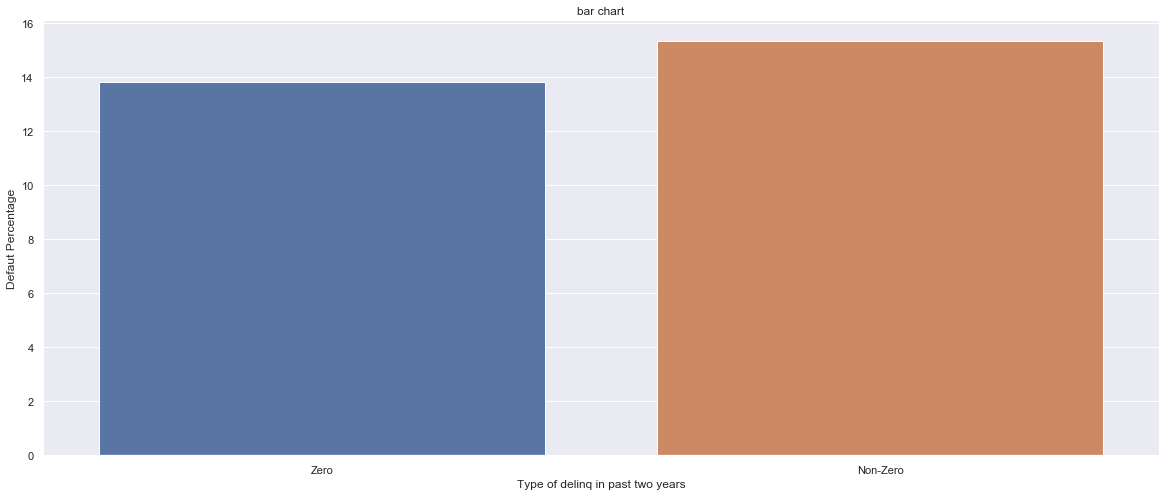

In [1032]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x="Delinq_2Years", y="Default Percentage",data=Delinq_2Years);
plot.set(xlabel='Type of delinq in past two years', ylabel='Defaut Percentage')
plt.title("bar chart")

## There is only a margin of difference in a person being default on the basis of zero and non-zero delinq in past two years.
## People who have delinqued in past two years are slightly high in percentage with Default loans.

In [1033]:
## Column 'earliest_cr_line', 
##We can find how old the borrower's credit line is, then we can calculate default percentage.
## to calculate how old the credit line issue is we will subtract with 'issue_d' column, that is the day loan was issued.

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['crdt_line_duration_inyrs'] = (loan['issue_d'] - loan['earliest_cr_line'])

In [1034]:
## Convert days to years.
loan['crdt_line_duration_inyrs'] = loan['crdt_line_duration_inyrs']/np.timedelta64(1, 'D')


In [1035]:
## Diving by 365 to convert into years.
loan['crdt_line_duration_inyrs'] = loan['crdt_line_duration_inyrs'].apply(lambda x: round(x/365,2))

In [1036]:
## Ignoring the rows with negative difference and outliers above 30yr old.

loanTemp = loan.loc[(loan['crdt_line_duration_inyrs'] >= 0) & (loan['crdt_line_duration_inyrs'] < 30) ,:]
loanTemp

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,Experience Range,DTI_Range,Loan_Installment_Range,Duration_Months,Duration Range,RevolUtilGrp,Int_Rate_Range,FundsTypeSame,delinq_2yrs_range,crdt_line_duration_inyrs
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27,59.83,C,C4,...,0-2,0-5,0-200,16,10-20,0-20,15-20,True,NaN,12.68
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49,339.31,C,C1,...,8+,15-20,200-400,37,30-40,20-40,10-15,True,NaN,15.84
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90,156.46,A,A4,...,2-4,10-15,0-200,37,30-40,20-40,5-10,True,NaN,7.08
6,1069639,1304742,7000,7000,7000.000000,60 months,15.96,170.08,C,C5,...,6-8,20-25,0-200,53,50-60,80-100,15-20,True,NaN,6.42
7,1072053,1288686,3000,3000,3000.000000,36 months,18.64,109.43,E,E1,...,8+,5-10,0-200,37,30-40,80-100,15-20,True,NaN,4.92
9,1071570,1306721,5375,5375,5350.000000,60 months,12.69,121.45,B,B5,...,0-2,15-20,0-200,11,10-20,20-40,10-15,False,NaN,7.25
10,1070078,1305201,6500,6500,6500.000000,60 months,14.65,153.45,C,C3,...,4-6,15-20,0-200,18,10-20,20-40,10-15,True,NaN,13.92
11,1069908,1305008,12000,12000,12000.000000,36 months,12.69,402.54,B,B5,...,8+,10-15,400-600,21,20-30,60-80,10-15,True,NaN,22.18
12,1064687,1298717,9000,9000,9000.000000,36 months,13.49,305.38,C,C1,...,0-2,10-15,200-400,7,0-10,80-100,10-15,True,NaN,7.67
13,1069866,1304956,3000,3000,3000.000000,36 months,9.91,96.68,B,B1,...,2-4,10-15,0-200,37,30-40,40-60,5-10,True,NaN,8.42


In [1037]:
bins = [0,10,20,30,]
groups = ["0-10","10-20","20-30"]
loanTemp['crdt_line_range'] = pd.cut(loan['crdt_line_duration_inyrs'],bins,labels=groups)

F:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1038]:
loamTemp1 = loanTemp.groupby(by="crdt_line_range").sum().reset_index()

In [1039]:
percentage1 = (loamTemp1.loc[0,'loan_status_dup']/loanTemp.loc[loanTemp['crdt_line_range'] == "0-10",'id'].count())*100
percentage2 = (loamTemp1.loc[1,'loan_status_dup']/loanTemp.loc[loanTemp['crdt_line_range'] == "10-20",'id'].count())*100
percentage3 = (loamTemp1.loc[2,'loan_status_dup']/loanTemp.loc[loanTemp['crdt_line_range'] == "20-30",'id'].count())*100


In [1040]:
loamTemp1['Default_Percentage']= [percentage1,percentage2,percentage3]

Text(0.5, 1.0, 'bar chart')

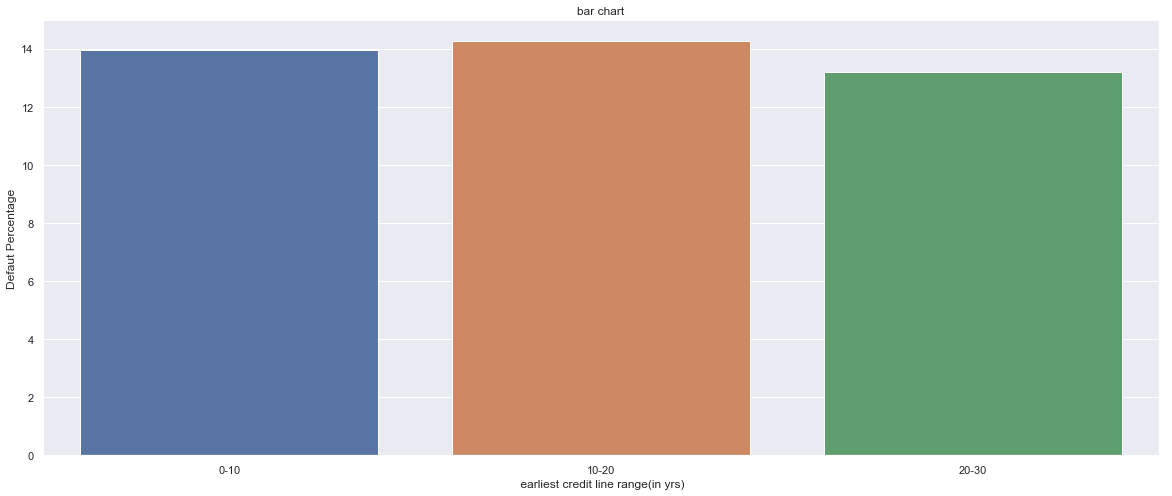

In [1041]:
sns.set(rc={'figure.figsize':(20,8)})
plot = sns.barplot(x="crdt_line_range", y="Default_Percentage",data=loamTemp1);
plot.set(xlabel=' earliest credit line range(in yrs)', ylabel='Defaut Percentage')
plt.title("bar chart")

## This graph shows us how the credit line history(in yrs) range affects the percentage of defaulters,
## However we can see that people with maximum history range i.e 20 to 30 years default the least.

In [96]:
## purpose column
purposeLoan = loan.groupby(by="purpose").count().reset_index()

In [97]:
purposeLoan

,purpose,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,loan_amnt_range,loan_status_dup,Year Expereince,Experience Range,DTI_Range,Loan_Installment_Range
0,car,1395,1395,1395,1395,1395,1395,1395,1395,1395,...,1395,1395,1395,1395,1395,1395,1395,1395,1383,1395
1,credit_card,4626,4626,4626,4626,4626,4626,4626,4626,4626,...,4626,4626,4626,4626,4626,4626,4626,4626,4620,4626
2,debt_consolidation,16909,16909,16909,16909,16909,16909,16909,16909,16909,...,16909,16909,16909,16909,16909,16909,16909,16909,16889,16909
3,educational,276,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,272,276
4,home_improvement,2614,2614,2614,2614,2614,2614,2614,2614,2614,...,2614,2614,2614,2614,2614,2614,2614,2614,2591,2614
5,house,330,330,330,330,330,330,330,330,330,...,330,330,330,330,330,330,330,330,324,330
6,major_purchase,1973,1973,1973,1973,1973,1973,1973,1973,1973,...,1973,1973,1973,1973,1973,1973,1973,1973,1951,1973
7,medical,622,622,622,622,622,622,622,622,622,...,622,622,622,622,622,622,622,622,622,622
8,moving,523,523,523,523,523,523,523,523,523,...,523,523,523,523,523,523,523,523,519,523
9,other,3462,3462,3462,3462,3462,3462,3462,3462,3462,...,3462,3462,3462,3462,3462,3462,3462,3462,3437,3462


In [1043]:
percentage1 = (purposeLoan.loc[0,'loan_status_dup']/loan.loc[loan['purpose'] == "car",'id'].count())*100
percentage2 = (purposeLoan.loc[1,'loan_status_dup']/loan.loc[loan['purpose'] == "credit_card",'id'].count())*100
percentage3 = (purposeLoan.loc[2,'loan_status_dup']/loan.loc[loan['purpose'] == "debt_consolidation",'id'].count())*100
percentage4 = (purposeLoan.loc[3,'loan_status_dup']/loan.loc[loan['purpose'] == "educational",'id'].count())*100
percentage5 = (purposeLoan.loc[4,'loan_status_dup']/loan.loc[loan['purpose'] == "home_improvement",'id'].count())*100
percentage6 = (purposeLoan.loc[5,'loan_status_dup']/loan.loc[loan['purpose'] == "house",'id'].count())*100
percentage7 = (purposeLoan.loc[6,'loan_status_dup']/loan.loc[loan['purpose'] == "major_purchase",'id'].count())*100
percentage8 = (purposeLoan.loc[7,'loan_status_dup']/loan.loc[loan['purpose'] == "medical",'id'].count())*100
percentage9 = (purposeLoan.loc[8,'loan_status_dup']/loan.loc[loan['purpose'] == "moving",'id'].count())*100
percentage10 = (purposeLoan.loc[9,'loan_status_dup']/loan.loc[loan['purpose'] == "other",'id'].count())*100
percentage11 = (purposeLoan.loc[10,'loan_status_dup']/loan.loc[loan['purpose'] == "renewable_energy",'id'].count())*100
percentage12 = (purposeLoan.loc[11,'loan_status_dup']/loan.loc[loan['purpose'] == "small_business",'id'].count())*100
percentage13 = (purposeLoan.loc[12,'loan_status_dup']/loan.loc[loan['purpose'] == "vacation",'id'].count())*100
percentage14 = (purposeLoan.loc[13,'loan_status_dup']/loan.loc[loan['purpose'] == "wedding",'id'].count())*100


In [1044]:
purposeLoan['Deafut Percentage'] = [percentage1,percentage2,percentage3,percentage4,percentage5,percentage6,percentage7,percentage8,percentage9,percentage10,percentage11,percentage12,percentage13,percentage14]
purposeLoan = purposeLoan.sort_values(by="Deafut Percentage",ascending=False)
purposeLoan

,purpose,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_dup,Year Expereince,Duration_Months,FundsTypeSame,crdt_line_duration_inyrs,Deafut Percentage
11,small_business,890277420,1098916627,18058600,17375450,1.598057e+07,17512.14,515091.43,9.964073e+07,15202.69,...,40668.7032,3749240.26,1351,59.0,356,6401,36573,542.0,17664.84,26.350851
10,renewable_energy,60710213,76034658,765700,755275,6.753499e+05,1004.55,22363.57,7.239919e+06,1022.03,...,1989.9692,220652.14,87,4.0,15,519,2379,53.0,1212.83,17.241379
3,educational,120519460,142273267,1894750,1860050,1.623494e+06,3246.34,60752.38,1.547509e+07,3228.05,...,4947.4168,342072.70,276,8.0,45,1084,7278,88.0,3337.00,16.304348
9,other,2260162348,2815960722,27690875,27082100,2.576972e+07,40891.36,820376.16,2.200252e+08,43015.96,...,24159.5342,6540497.84,3462,99.0,546,17117,96933,2007.0,44449.21,15.771231
5,house,223456706,277579037,4247575,4122600,3.955470e+06,4063.71,121554.40,2.563015e+07,3531.36,...,3889.1163,1164008.34,330,14.0,52,1625,8670,157.0,4369.07,15.757576
7,medical,429081318,534529811,5080100,4992175,4.825038e+06,7195.35,146526.91,4.260427e+07,7695.98,...,4953.6004,1258895.29,622,35.0,95,3254,17775,383.0,8518.68,15.273312
8,moving,355457745,443901979,3477675,3397125,3.296055e+06,6055.29,102907.79,3.316703e+07,6167.97,...,2608.1351,775625.37,523,16.0,79,2065,14847,345.0,6092.82,15.105163
2,debt_consolidation,11794085167,14714220479,213159125,208076400,2.005456e+08,210285.58,6190927.19,1.140344e+09,245262.28,...,236126.4486,55243360.53,16909,758.0,2508,87343,480503,7826.0,228503.78,14.832338
12,vacation,235785868,295468202,1842125,1815950,1.776794e+06,3607.89,55066.28,2.027139e+07,4044.40,...,1371.2144,406768.26,332,20.0,49,1891,9225,234.0,4135.85,14.759036
4,home_improvement,1777269284,2220714610,29455300,28617950,2.740908e+07,29599.36,827725.07,2.338345e+08,29391.45,...,13840.6005,8145120.23,2614,114.0,296,15417,75450,1310.0,38748.81,11.323642


Text(0.5, 1.0, 'bar chart')

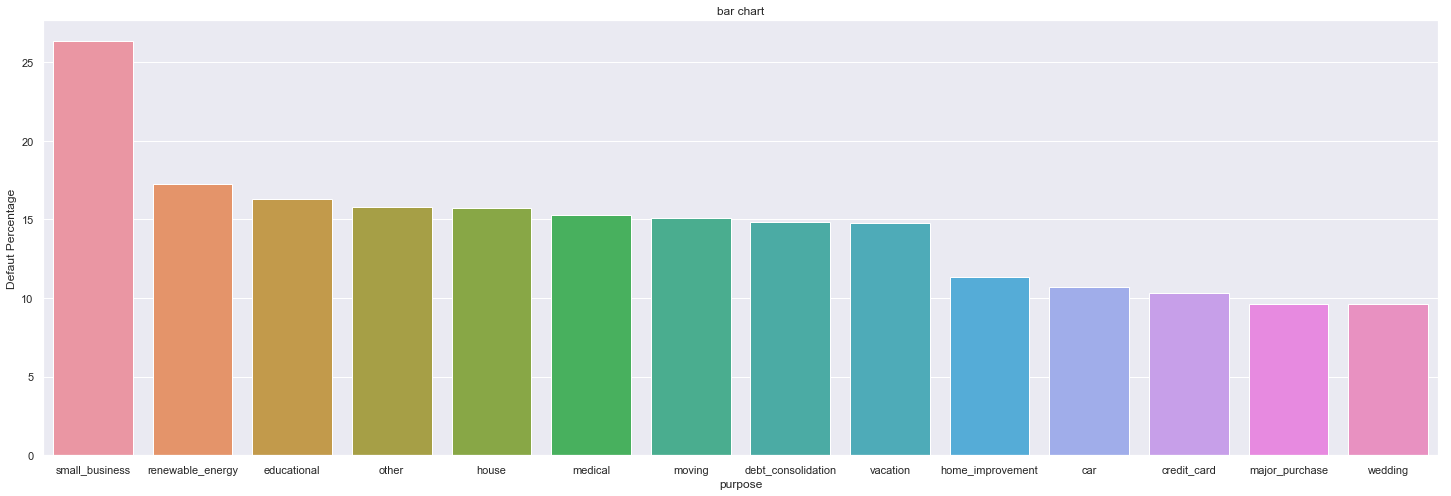

In [1045]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(x="purpose", y="Deafut Percentage",data=purposeLoan);
plot.set(xlabel='purpose', ylabel='Defaut Percentage')
plt.title("bar chart")

## This plot clearly tells us which purpose type defaults the most.